In [1]:
import tensorflow as tf
import keras as keras

In [2]:
print("tensorflow:", tf.__version__)
print("keras:", keras.__version__)

tensorflow: 2.13.0
keras: 2.13.1


# Linear Classification

* Problem: patient has malignant breast cancer or not

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [71]:
# Load the data
from sklearn.datasets import load_breast_cancer

In [72]:
# load the data
df = load_breast_cancer()
type(df)

sklearn.utils._bunch.Bunch

In [11]:
# Note: It is a Bunch object
# this basically acts like a dictionary where you can  treat the keys like attributes
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
df.data.shape

(569, 30)

In [13]:
# Targets
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
df.target_names
# Here 0: malignant,  1: benign

array(['malignant', 'benign'], dtype='<U9')

In [15]:
df.target.shape # there are 569 corresponding targets

(569,)

In [16]:
# the meaning of each feature
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
# now we are ready to split the data into a training and test data sets
from sklearn.model_selection import train_test_split


In [73]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=.33)
N, D = X_train.shape

In [74]:
print(N, D)

381 30


In [20]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
# Build the model using Tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)), # input layer with 30 features
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer with 1 node for classification
])

# Alternatively, you can do:
# model = tf.keras.models.sequential()
# model.add(tf.keras.layhers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [99]:
model.compile(optimizer='adam', # Adam stands for Adaptive Moment Estimation, and it's an extension of stochastic gradient descent (SGD) 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [100]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5510 - loss: 0.7473 - val_accuracy: 0.5798 - val_loss: 0.6817
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6295 - loss: 0.6855 - val_accuracy: 0.6649 - val_loss: 0.6114
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7141 - loss: 0.5829 - val_accuracy: 0.7394 - val_loss: 0.5518
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7639 - loss: 0.5475 - val_accuracy: 0.7766 - val_loss: 0.5020
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4894 - val_accuracy: 0.7926 - val_loss: 0.4605
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8150 - loss: 0.4703 - val_accuracy: 0.8191 - val_loss: 0.4258
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.4274 - val_accuracy: 0.8457 - val_loss: 0.3957
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8870 - loss: 0.3969 - val_accuracy: 0.8670 - v

In [79]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.9739 - loss: 0.1253
Train score: [0.10024593770503998, 0.9790025949478149]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9664 - loss: 0.1092
Test score: [0.10135240852832794, 0.9734042286872864]


In [32]:
# Plot of loss history
import matplotlib.pyplot as plt

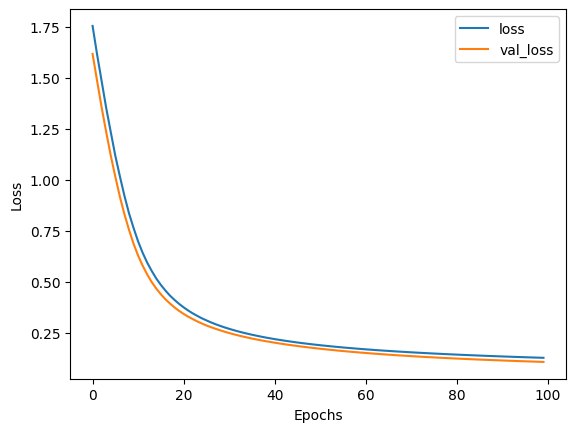

In [38]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

# Adding x and y labels
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')    # Label for the y-axis

plt.legend()

# Displaying the plot
plt.show()

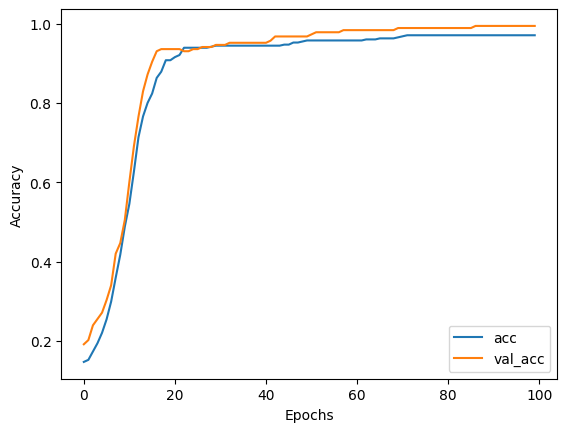

In [44]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

# Adding x and y labels
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')    # Label for the y-axis

plt.legend()

# Displaying the plot
plt.show()

# Making predictions

In [101]:
P = model.predict(X_test)
print(P)
print(P.shape)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[9.92402315e-01]
 [9.94279385e-01]
 [1.77610204e-01]
 [6.20329261e-01]
 [9.76926684e-01]
 [7.65340519e-05]
 [6.45543914e-05]
 [1.49406667e-04]
 [9.49126065e-01]
 [9.78699028e-01]
 [9.92688239e-01]
 [9.91826594e-01]
 [2.58487038e-04]
 [9.97937381e-01]
 [3.47413309e-02]
 [3.75710719e-04]
 [8.31101060e-01]
 [7.43640423e-01]
 [9.97801363e-01]
 [9.83114779e-01]
 [8.69354531e-02]
 [8.23127568e-01]
 [9.90299344e-01]
 [9.94295061e-01]
 [2.15184983e-07]
 [2.15127668e-03]
 [1.17585943e-04]
 [2.89398333e-04]
 [9.91604149e-01]
 [9.87859190e-01]
 [8.45091641e-01]
 [9.85541224e-01]
 [1.40073588e-02]
 [9.77332592e-01]
 [9.97678459e-01]
 [9.18610871e-01]
 [8.51764202e-01]
 [9.97845292e-01]
 [9.98610735e-01]
 [9.99586582e-01]
 [4.98105586e-02]
 [2.78232396e-01]
 [9.99781430e-01]
 [4.32633988e-06]
 [9.92039919e-01]
 [3.84076923e-01]
 [4.45846617e-01]
 [1.05175823e-04]
 [1.04023318e-03]
 [9.98692513e-01]
 [1.43989250e-02]
 [8.33643734e-01]
 [8.14590096e-01]
 [9.9477

In [102]:
# Round to get the actual predictions
P = np.round(P).flatten()
print(P)

[1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]


The flatten() function is used to convert a multi-dimensional array (in this case, a 2D array of shape (188, 1)) into a 1D array (with shape (188,)). This makes more convenient for further processing, such as comparing predicted values with actual values, plotting, or feeding them into other functions that expect 1D arrays.

In [103]:
# Now calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9468085106382979
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.9589 - loss: 0.1097
Evaluate output: [0.10994285345077515, 0.9468085169792175]


# Saving and Loading a Model

In [115]:
# Let's save our model to a file
model.save('logistic.classifier.h5') # Keras format

#check that the model file exists
!dir

 Volume in drive C has no label.
 Volume Serial Number is 8AEB-BFA5

 Directory of C:\Users\006816379

09/17/2024  10:18 AM    <DIR>          .
08/08/2024  10:21 AM    <DIR>          ..
08/30/2024  10:59 PM    <DIR>          .anaconda
09/17/2024  10:18 AM    <DIR>          .conda
08/30/2024  11:01 PM                25 .condarc
08/30/2024  10:59 PM    <DIR>          .continuum
09/14/2024  10:20 PM    <DIR>          .ipynb_checkpoints
08/31/2024  12:36 AM    <DIR>          .ipython
08/31/2024  12:35 AM    <DIR>          .jupyter
08/31/2024  03:00 PM    <DIR>          .keras
09/15/2024  11:52 PM    <DIR>          .matplotlib
08/08/2024  03:17 PM    <DIR>          .ms-ad
09/17/2024  10:10 AM    <DIR>          .thinkorswim
08/08/2024  10:21 AM    <DIR>          ansel
08/08/2024  10:21 AM    <DIR>          Contacts
09/12/2024  09:19 AM    <DIR>          Creative Cloud Files
09/10/2024  11:15 PM    <DIR>          Desktop
08/31/2024  10:49 PM    <DIR>          Documents
09/16/2024  10:45 PM   

In [117]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the m odel with ONLY Dense(1, input_shape=(D,1))
model = tf.keras.models.load_model(r'C:\Users\006816379\logistic.classifier.keras') 
# if you used Input() layer explicitly, you need 'r' in front of the pathe

print(model.layers)
model.evaluate(X_test, y_test)

[<Dense name=dense_5, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.9589 - loss: 0.1097


C:\Users\006816379\AppData\Local\anaconda3\envs\stat479\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


[0.10994285345077515, 0.9468085169792175]

`Dense`
* This indicates that the layer is a Dense layer, which is a fully connected neural network layer. In a Dense layer, every input is connected to every neuron in the layer.

`name=dense_5`
* This is the name of the layer, which in this case is dense_5. Keras automatically assigns names to layers if you don't specify them.

`built=True`
* This indicates that the layer has been built, meaning that the layer is ready for computation.

# Linear Regression

In [46]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------- ----------------------- 4.7/11.5 MB 23.7 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 24.8 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 24.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
!pip install requests

In [51]:
import urllib.request

In [52]:
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'
urllib.request.urlretrieve(url, 'moore.csv')

print("File dowwnload successfully.")

File dowwnload successfully.


In [53]:
data = pd.read_csv('moore.csv', header=None).values
print(data.shape)


(162, 2)


In [54]:
X = data[:,0].reshape(-1,1) # make it a 2-D array of size N by 1
print(X.shape)

(162, 1)


data[:,0]: This extracts all the values from the first column (column index 0) of the data array. Since the shape of data is (162, 2), it takes the entire first column, resulting in a 1D array of shape (162,).

.reshape(-1,1): This reshapes the extracted 1D array into a 2D array. The argument -1 in reshape means "infer this dimension based on the other dimensions." Here, -1 will be inferred as 162, so the final shape will be (162, 1).



In [55]:
Y = data[:,1]
print(Y.shape)

(162,)


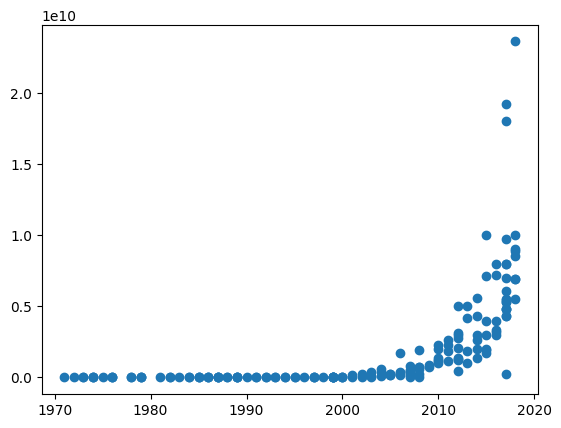

In [57]:
# Plot the data - it is exponential!
plt.scatter(X,Y)

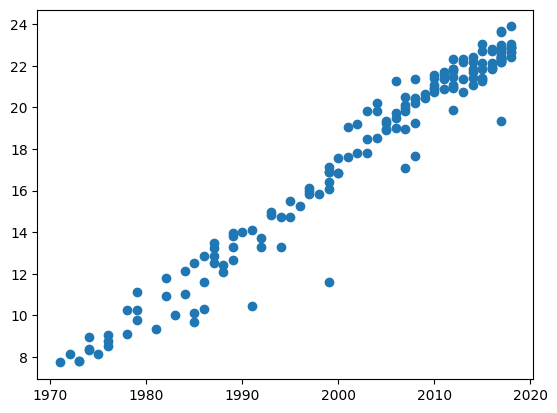

In [58]:
# Since we want a linear model, let's take the log transformation
Y = np.log(Y)
plt.scatter(X, Y)

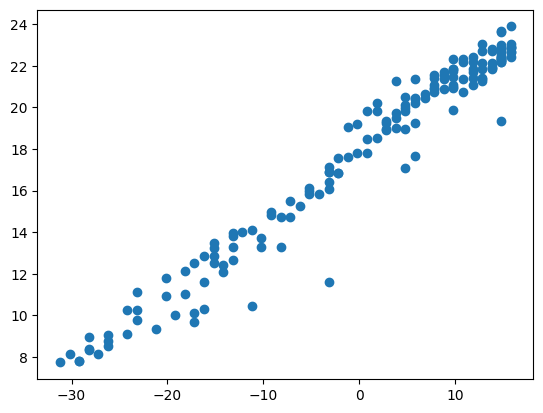

In [59]:
# Let's also center the X data so the values are not too large
X = X - X.mean()

plt.scatter(X,Y)

In [86]:
# Now create our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)), # 1 feature, year
    tf.keras.layers.Dense(1) # 1 output and since it is a linear regression, no activation function
])  

In [87]:
model.compile(optimizer=tf.keras.optimizers.SGD(.001, .9), loss='mse') # here SGD(learning_rate, momentum)

optimizer=tf.keras.optimizers.SGD(0.001, 0.9)
This sets the optimizer to be Stochastic Gradient Descent (SGD) with the following parameters:

* 0.001: This is the learning rate. It controls how large a step is taken in the direction of minimizing the loss function during each update. A lower value like 0.001 indicates smaller steps, leading to slower but more controlled convergence.

* 0.9: This is the momentum parameter. Momentum helps to accelerate gradient vectors in the right direction, thus leading to faster converging. A momentum value of 0.9 means that the optimizer will remember 90% of the previous update's direction and use it to guide the current update.

In [88]:
# learning rate scheduler is used to dynamically adjust the learning rate during training based on the number of epochs.
def schedule(epoch, lr):
    if epoch >= 50:
        return .0001
    return .001

# This means the model starts with a relatively higher learning rate (0.001) to make large adjustments during the early stages of training. 
# After epoch 50, the learning rate is significantly reduced to allow finer adjustments and help the model converge more smoothly.

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 319.5159 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 289.8066 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 299.1750 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 311.5302 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 149.3590 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 130.7895 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 102.1153 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 104.3842 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 92.1742 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 115.2456 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 45.0712 - learning_r

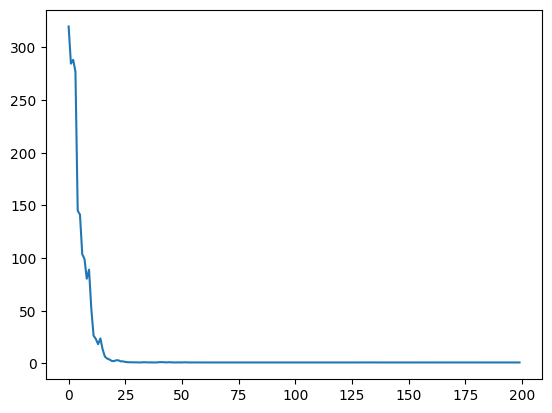

In [89]:
# plot the loss
plt.plot(r.history['loss'], label='loss') # showing convergence

In [90]:
# Get the slope of the line
print(model.layers) # there is only one layer, the input layer doesn't count
print(model.layers[0].get_weights()) # retrieves the weights and biases of the first layer (layers[0]) of a neural network model

[<Dense name=dense_4, built=True>]
[array([[0.34028247]], dtype=float32), array([17.77779], dtype=float32)]


Here the weight would be .338 and W.shape = (D, M), where D=input size and M=output size
b = 17.76 and the b.shape = (M, )

In [69]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.33796832


model.layers[0]:
* This refers to the first layer in your model (since indexing starts from 0). If your model has multiple layers, this selects the very first one.

.get_weights()[0]
* get_weights()[0] retrieves the weights (as opposed to the biases, which would be get_weights()[1]).

[0, 0]:
*This indexing accesses the element located at the first row (0) and the first column (0) of the weight matrix.

Our original model for exponential growth is;
$$C = A_0 \cdot r^t,$$
where $C$ is transistor the count, $t$ is the year, and $r$ is the rate of growth.  
For example, when $t$ goes from 1 to 2, $C$ increases by a factor of $r$. When $t$ goes from 2 to 3, $C$ increases by a factor of $r$ again.  
When we take the log of both sides,
$$\log C = t \cdot \log r + \log A_0$$  

This is our linear equation
$$ \hat{y} = ax + b,$$
where 
$$\hat{y} = \log C$$
$$a = \log r$$
$$x = t$$
$$b = \log A_0$$
To find the rate of growth $r$, the slope of the line 
$$a = \log r=.33796832$$
Thus, 
$$r = e^.33796832=1.402096$$

# Making predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


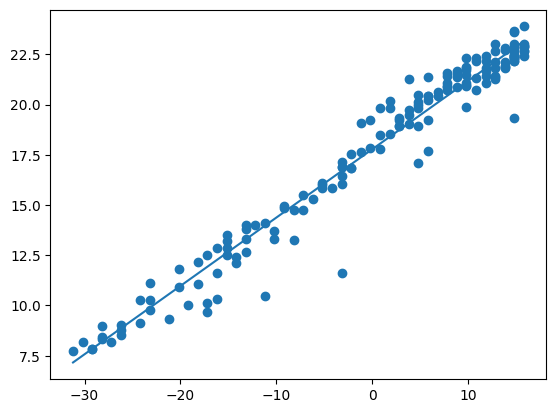

In [91]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [92]:
#Manual calculation


In [93]:
# Get the weights
w, b = model.layers[0].get_weights() # retrieves the weights and biases of the first layer (layers[0]) of a neural network model
print(w)
print(b)

[[0.34028247]]
[17.77779]


In [94]:
# Reshape X becasue we flattened it again earlier
print(X.shape)
X = X.reshape(-1,1) # 
print(X.shape)

(162, 1)
(162, 1)


X.reshape(-1, 1):
* -1: The -1 tells NumPy to automatically determine the number of rows based on the length of the array and the other dimensions. This ensures that the total number of elements remains unchanged.
* 1: This specifies that the new shape should have 1 column.

In [95]:
# (N by 1) x (1 by 1) + (1) -> (N by 1)
Yhat2 = (X.dot(w) + b).flatten()
print(Yhat2.shape)

(162,)


In [96]:
# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True

# Keras 

Keras is a deep-learning framework for Python that is a model-level library, providing high-level building blocks for developing deep-learning models.

Keras has the following key features:
* It allows the same code to run seamlessly on CPU or GPU.
* It has a user-friendly Application Programming Interface (API) that makes it easy to quickly prototype deep-learning models.
* It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.

# ANN for image classification

## STEPS

* #1 - Load in the data
  * MNIST dataset
  * 10 digits (0 to 9)
  * Already included in Tensorflow
 
* #2 Build the model
  * Sequential dense layers ending with multiclass logistic regression
 
* #3 Train the model

* #4 Evaluate th emodel

* #5 Make predictions

## Using MNIST dataset

In [3]:
# Example: MNIST (the National Institute of Standards and Technology) dataset
# This dataset is standard machine learning benchmark of handwritten digits.
import tensorflow as tf
import keras as keras

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape) # Nx28x28
print(train_labels.shape) # N

(60000, 28, 28)
(60000,)


In [5]:
print(test_images.shape) # Nx28x28
print(test_labels.shape) # N

(10000, 28, 28)
(10000,)


The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 = 784 pixels, grayscale) into their 10 categories (0 through 9). We’ll use the MNIST dataset, a classic in the machine-learning community, which has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.

The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9.

In [122]:
print(train_images.ndim) # 3D tensor 
print(train_images.shape) # an array of 60,000 matrices of 28 × 28 integers
print(train_images.dtype) # a 3D tensor of 8-bit integers; Each such matrix is a grayscale image, with coefficients between 0 and 255.
print(len(train_labels))
train_labels

3
(60000, 28, 28)
uint8
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

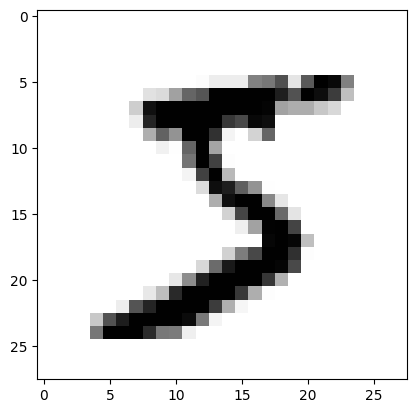

In [129]:
# Displaying 4th digit in this 3D tensor
digit = train_images[0] # select a specific digit: sample 0 to 
#print(digit)  

import matplotlib.pyplot as plt # you need to install matplotlib like "conda install matplotlib"
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [128]:
# Manipulating tensors in Numpy
# Selecting specific elements in a tensor is called tensor slicing.
# selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28):
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [130]:
# It’s equivalent to this more detailed notation
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [133]:
# data batches
# break the data into small batches; 
# batch size of 128

n = 2; # n is an integer
batch = train_images[128*n:128*(n+1)]
batch.shape

(128, 28, 28)

### Why Use Batches?
* Memory Efficiency: Instead of loading the entire dataset into memory at once, which may not be feasible for large datasets, training with smaller batches helps conserve memory.

* Faster Training: Updating the model after every batch instead of the entire dataset allows for faster updates and quicker convergence during training.

* Improved Generalization: Using batches introduces some stochasticity (randomness) in the training process, which can help prevent overfitting and improve the model's generalization to unseen data.

* Parallelization: Batches can be processed in parallel, leveraging modern hardware (GPUs/TPUs), making training more efficient.


In [6]:
train_images, test_images = train_images/255.0, test_images /255.0 # normalize to the range [0, 1]

print("train_images.shape:",train_images.shape) 
print("test_images.shape:",test_images.shape) 


train_images.shape: (60000, 28, 28)
test_images.shape: (10000, 28, 28)


In [7]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### `tf.keras.layers.Flatten`:
* Flatten is a Keras layer that takes a multi-dimensional input (like a 2D image) and flattens it into a 1D vector.
* In this case, the input to the model is a 28x28 grayscale pixel image, which has a shape of (28, 28).
#### `input_shape=(28, 28)`:
* The Flatten layer will convert each input image from a 2D array with shape (28, 28) into a 1D array of size 28 * 28 = 784. 

In [8]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

##  `optimizer='adam':`

* Adam (Adaptive Moment Estimation) is an optimization algorithm that combines the advantages of two other optimizers:
  -  RMSProp: Which adjusts the learning rate based on recent gradients.
  - Momentum: Which helps smooth the optimization by considering previous updates.

## `loss='sparse_categorical_crossentropy':`

* The loss function measures how far off the model's predictions are from the true labels.
* `sparse_categorical_crossentropy` is used when you're performing multi-class classification and your target labels are integers (e.g., 0, 1, 2,...), rather than one-hot encoded vectors.
* It's a variation of categorical crossentropy but is used when the labels are provided as sparse integers (like class indices).
    - Example: For digit classification, your labels might be 0 for the digit "0", 1 for the digit "1", and so on up to 9.
* It calculates the difference between the predicted probability distribution (from the model) and the actual label in a way that encourages the model to predict the correct class with high confidence.

In [10]:
r = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2174 - accuracy: 0.9357 - val_loss: 0.1009 - val_accuracy: 0.9690
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0963 - accuracy: 0.9708 - val_loss: 0.0776 - val_accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0694 - accuracy: 0.9779 - val_loss: 0.0723 - val_accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0532 - accuracy: 0.9832 - val_loss: 0.0747 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.0615 - val_accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0676 - val_accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.0641 - val_accuracy:

#### Why 1875 Batches?
* The `1875/1875` in the output refers to the number of batches processed during each epoch of training.

* If you're using the MNIST dataset (which has 60,000 training images) and a default batch size of 32, then the total number of batches is calculated as:

$$Total Batches
=
60
,
000
32
=
1875$$

Each batch processes 32 images, and after processing 1875 batches, all 60,000 images are processed once (i.e., completing one epoch).

In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


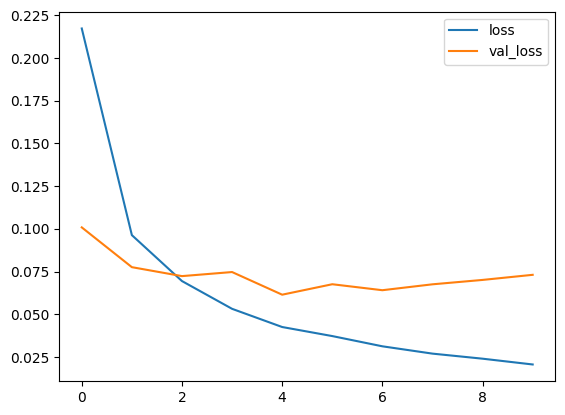

In [15]:
# Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

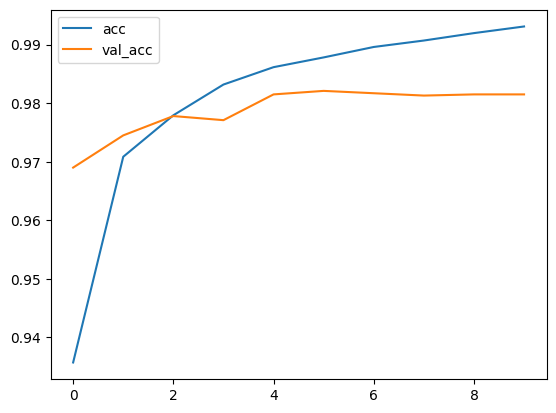

In [16]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
# Evaluate the model
print(model.evaluate(test_images, test_labels))

313/313 [==============================] - 0s 696us/step - loss: 0.0731 - accuracy: 0.9815
[0.07308640331029892, 0.9815000295639038]


## Confusiton matrix

In [21]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   ------------ --------------------------- 2.9/9.3 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 19.9 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   --- ------------------------------------ 4.2/42.2 MB 42.3 MB/s eta 0:00:01
   ------------- -------------------------- 14.2/42.2 MB 34.2 MB/s eta 0:00:01
   --------------- ------------------------ 16.5/42.2 MB 26.0 MB/s eta 0:00:01
   -------------------------- ------------- 28.0/42.2 MB 32.3 MB/s eta 0:00:01
   ---------------------------------- ----- 36.4/42.2 MB 34.1 MB/s eta 0:00:01
   ---------------------------------------- 42.2/42.2 MB 34.0

In [23]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [28]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    #---
    # cm: the confusion matrix (a 2D array) 
    # classes: A list or array of class labels (e.g., ['cat', 'dog']), which are used to label the axes of the confusion matrix.
    # title: title of the confusion matrix plot
    # cmap: the colormap for the confusion matrix plot, which will color the matrix using shades of blue.
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting 'normalize=True'.
    #---

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] # normalized to display proportions rather than raw counts
        # `cm.astype('float')` type conversion to flaot for obtaining fractional values
        # `cm.sum(axis=1)`: row-wise summation (in confusion matrix, each row represents the true class, and each column represents the predicted class
        #                   thus, this calculate the total number of occurrences (true labels) for each class.
        # `[:, np.newaxis]`: np.newaxis is used to add a new axis to the array.
        #                    In this case, it's turning the 1D array from cm.sum(axis=1) into a column vector 
        print("Normalized confusion matrix (proportion)")
    else:
        print("Confuusion matrix, without normalizaiton")

    print(cm)

    # Plotting the confusion matrix using a heatmap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # interpolation='nearest': This controls how pixel values are interpolated. 
    # Using 'nearest' means that the matrix is displayed without smoothing, so each cell in the matrix will be represented as a solid block of color.
    # cmap is the colormap used to color the cells of the confusion matrix. 
    plt.title(title) 
    plt.colorbar() # his adds a color bar next to the plot, indicating the color scale used in the heatmap. 
    tick_marks = np.arange(len(classes)) # np.arange(len(classes)) generates an array of tick positions (integers) from 0 to len(classes) - 1.
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Formatting the matrix values to show in the heatmap
    fmt = '.2f' if normalize else 'd' # If confusion matrix is normalized then use floating-point numbers with 2 decimal places
                                      # Otherwise, just use integers
    thresh = cm.max() / 2. # `thresh` sets a threshold to determine how to color the text inside the cells of the confusion matrix.
                           # cm.max(): This finds the maximum value in the confusion matrix. This could be the highest count or the highest proportion
                           # This means that for any cell with a value greater than `thresh`, the text will be white
                           # for any cell with a value less than or equal to `thresh`, the text will be black.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Example
cm = [[40, 10],
      [5,  45]]
cm.sum(axis=1)[:, np.newaxis] = [[50],
                                 [50]]
cm = [[40/50, 10/50],  # => [[0.8, 0.2]
      [5/50,  45/50]]  # => [0.1, 0.9]]


313/313 [==============================] - 0s 663us/step
Normalized confusion matrix (proportion)
[[9.92857143e-01 0.00000000e+00 2.04081633e-03 0.00000000e+00
  0.00000000e+00 1.02040816e-03 2.04081633e-03 1.02040816e-03
  1.02040816e-03 0.00000000e+00]
 [0.00000000e+00 9.92951542e-01 2.64317181e-03 8.81057269e-04
  0.00000000e+00 1.76211454e-03 0.00000000e+00 8.81057269e-04
  8.81057269e-04 0.00000000e+00]
 [2.90697674e-03 9.68992248e-04 9.79651163e-01 9.68992248e-04
  9.68992248e-04 0.00000000e+00 9.68992248e-04 6.78294574e-03
  5.81395349e-03 9.68992248e-04]
 [0.00000000e+00 0.00000000e+00 7.92079208e-03 9.75247525e-01
  0.00000000e+00 9.90099010e-04 0.00000000e+00 3.96039604e-03
  2.97029703e-03 8.91089109e-03]
 [0.00000000e+00 1.01832994e-03 4.07331976e-03 0.00000000e+00
  9.82688391e-01 0.00000000e+00 1.01832994e-03 1.01832994e-03
  0.00000000e+00 1.01832994e-02]
 [1.12107623e-03 0.00000000e+00 0.00000000e+00 5.60538117e-03
  0.00000000e+00 9.85426009e-01 2.24215247e-03 0.000000

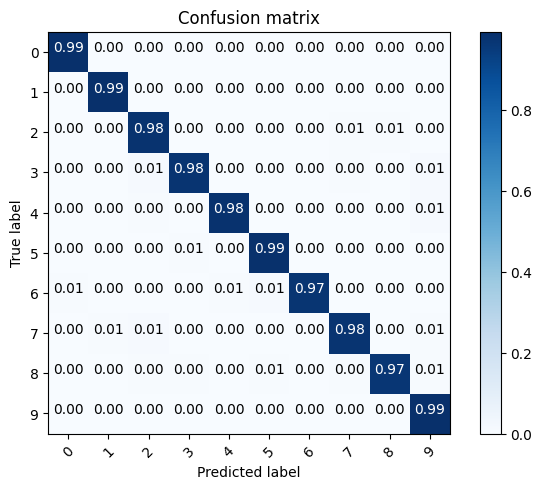

In [30]:
p_test = model.predict(test_images).argmax(axis=1)
# `argmax(axis=1)` returns the index (category) of the maximum value along the specified axis.cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, list(range(10)), normalize=True)


In [ ]:
# for example:
[[0.1, 0.05, 0.02, 0.75, 0.05, 0.01, 0.01, 0.01, 0.00, 0.00],  # Prediction for image 1
 [0.05, 0.10, 0.80, 0.03, 0.01, 0.00, 0.00, 0.00, 0.00, 0.01],  # Prediction for image 2
 ...
]
# This would be the return
[3, 2, ...]


[ 115  149  217  247  321  445  456  495  582  619  659  684  691  720
  740  844  947  951  956 1014 1039 1112 1156 1181 1182 1226 1242 1247
 1260 1319 1328 1393 1444 1500 1522 1527 1530 1549 1678 1681 1717 1754
 1813 1828 1878 1880 1901 1941 2004 2016 2024 2053 2070 2093 2109 2118
 2130 2135 2182 2280 2293 2369 2387 2414 2422 2462 2488 2597 2607 2648
 2654 2771 2877 2896 2921 2927 2939 2995 3023 3030 3073 3117 3225 3289
 3405 3422 3475 3503 3520 3559 3567 3702 3727 3749 3762 3796 3808 3838
 3853 3893 3906 3939 3946 3976 4063 4065 4176 4199 4201 4248 4271 4289
 4497 4536 4639 4807 4814 4833 4838 4860 4880 4890 5067 5140 5642 5676
 5734 5749 5887 5936 5937 5955 5973 5997 6004 6011 6023 6024 6059 6166
 6168 6555 6574 6576 6597 6625 6651 6755 6847 7216 7800 7821 7849 7858
 7921 8091 8094 8246 8277 8311 8325 8408 8527 9009 9015 9024 9280 9587
 9634 9664 9679 9729 9742 9745 9768 9770 9779 9782 9792 9811 9832 9839
 9858 9944 9975]


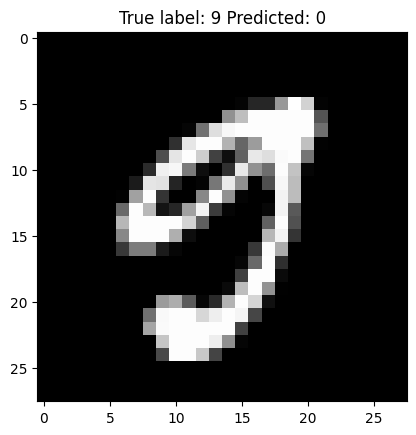

In [37]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != test_labels)[0]
print(misclassified_idx)

i = np.random.choice(misclassified_idx)
plt.imshow(test_images[i], cmap='gray')
plt.title("True label: %s Predicted: %s" %(test_labels[i], p_test[i])); # semi-colon is used to suppress any unnecessary extra output displayed
# in %(test_labels[i], p_test[i]), % is an operator to tell Python to substitue the values into the placeholders in the string

## ANN Regression

In [39]:
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

In [56]:
# make the dataset
N = 1000
X = np.random.random((N,2))*6 - 3 # 2D data points uniformly distributed between (-3, 3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


* This implenets the function:
$$ y = cos(2x_1) + cos(3x_2)$$

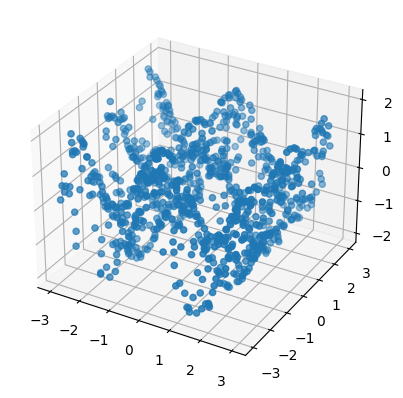

In [43]:
# plot it
fig = plt.figure() # create an empty figure
ax = fig.add_subplot(111, projection ='3d') # add 3 d plot to an existing figure object (fig)
# 111 is shorthand notation that tells Matplotlib to create a grid of subplots with 1 row, 1 column (final subplot of 1x1 grid)
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [44]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])


In [45]:
# Compile and fit
opt = tf.keras.optimizers.Adam(.01) # Adam (Adaptive Moment Estimation) optimizer with a specified learning rate of .01
# Adam combines the benefits of two popular optimizers
# * Momentum: Helps accelerate gradient descent by considering the previous gradients to smooth the update steps.
# * RMSProp: Adjusts the learning rate based on recent gradient magnitudes to help maintain a good learning speed.
model.compile(optimizer=opt, loss='mse')
r = model.fit(X,Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 484us/step - loss: 1.0182
Epoch 2/100
32/32 [==============================] - 0s 581us/step - loss: 0.9385
Epoch 3/100
32/32 [==============================] - 0s 581us/step - loss: 0.9080
Epoch 4/100
32/32 [==============================] - 0s 452us/step - loss: 0.8724
Epoch 5/100
32/32 [==============================] - 0s 404us/step - loss: 0.8106
Epoch 6/100
32/32 [==============================] - 0s 419us/step - loss: 0.7708
Epoch 7/100
32/32 [==============================] - 0s 452us/step - loss: 0.6856
Epoch 8/100
32/32 [==============================] - 0s 484us/step - loss: 0.6369
Epoch 9/100
32/32 [==============================] - 0s 452us/step - loss: 0.5954
Epoch 10/100
32/32 [==============================] - 0s 452us/step - loss: 0.5540
Epoch 11/100
32/32 [==============================] - 0s 500us/step - loss: 0.5386
Epoch 12/100
32/32 [==============================] - 0s 452us/step - loss: 0.5308
Epoch 13/100


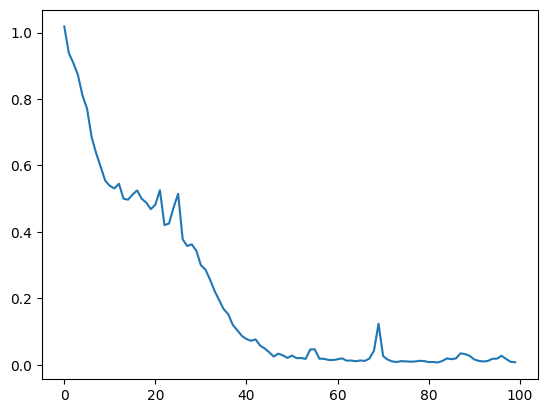

In [46]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

(50, 50)
(50, 50)
(2500, 2)
79/79 [==============================] - 0s 346us/step


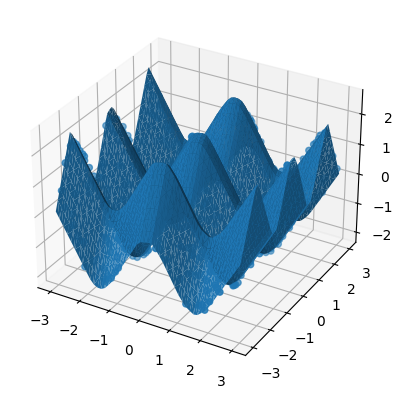

In [57]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
print(xx.shape)
print(yy.shape)

Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
print(Xgrid.shape)
Yhat = model.predict(Xgrid).flatten()
# 3D triangular surface plot
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=.2, antialiased = True) # antialiased = True ensures that the surface plot has smoother lines
plt.show()

In [53]:
# for example, before .T
[[x1, x2, x3, ..., xN],  # X-values
 [y1, y2, y3, ..., yN]]  # Y-values

# after .T
[[x1, y1],  # (x1, y1)
 [x2, y2],  # (x2, y2)
 [x3, y3],  # (x3, y3)
 ...
 [xN, yN]]  # (xN, yN)



79/79 [==============================] - 0s 385us/step
